In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data = pd.merge(mouse, trial, on="Mouse ID")

# Display the data table for preview

data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mtvcol = data[['Drug','Timepoint','Tumor Volume (mm3)']]
mtvcol.sort_values(by = ['Drug'])
mtv = mtvcol.groupby(["Drug","Timepoint"])[["Tumor Volume (mm3)"]].mean().reset_index()
# Convert to DataFrame
tumor = pd.DataFrame(mtv)
# Preview DataFrame
tumor

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mtvse = mtvcol.groupby(["Drug","Timepoint"])[["Tumor Volume (mm3)"]].std().reset_index()
# Convert to DataFrame
tumorse = pd.DataFrame(mtvse)
# Preview DataFrame
tumorse.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,2.242964
2,Capomulin,10,3.513422
3,Capomulin,15,4.108369
4,Capomulin,20,4.362915


In [37]:
# Minor Data Munging to Re-Format the Data Frames
mtv_table = pd.pivot_table(mtvcol, values='Tumor Volume (mm3)', index='Timepoint', columns='Drug')

# Preview that Reformatting worked
mtv_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


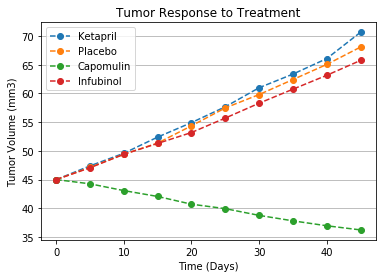

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)
x = mtvcol["Timepoint"].unique()
y = mtv_table["Tumor Volume (mm3)"][["Ketapril","Placebo","Capomulin","Infubinol"]]


plt.plot(x, y,linestyle='--',marker='o')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.grid(axis='y')
plt.legend(["Ketapril","Placebo","Capomulin","Infubinol"])
plt.show()

# Save the Figure

plt.savefig("Tumor_Response_Treatment.png")

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meanmet = data.groupby(["Drug","Timepoint"])[["Metastatic Sites"]].mean()

# Convert to DataFrame
meanmetdf = pd.DataFrame(meanmet)
# Preview DataFrame
meanmetdf

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semmet = data.groupby(["Drug","Timepoint"])[["Metastatic Sites"]].sem()

# Convert to DataFrame
semmetdf = pd.DataFrame(semmet)
# Preview DataFrame
semmetdf.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
meta_table = data.groupby(["Drug","Timepoint"])[["Metastatic Sites"]].mean().unstack(0)

# Preview that Reformatting worked
meta_table

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


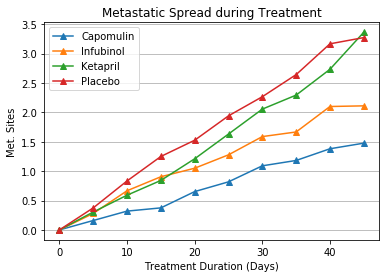

In [12]:
# Generate the Plot (with Error Bars)
x = data["Timepoint"].unique()
y = meta_table["Metastatic Sites"][["Capomulin","Infubinol","Ketapril","Placebo"]]

plt.plot(x,y,marker='^')
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"])
plt.grid(axis='y')
plt.title("Metastatic Spread during Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
# Save the Figure
plt.savefig("Metastatic Spread during Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = data.groupby(["Drug","Timepoint"])[["Mouse ID"]].count()

# Convert to DataFrame
micedf = pd.DataFrame(mice_count).reset_index()

# Preview DataFrame
micedf.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [30]:
# Minor Data Munging to Re-Format the Data Frames
micetable = pd.pivot_table(micedf, values='Mouse ID', index='Timepoint', columns='Drug')

# Preview the Data Frame
micetable.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


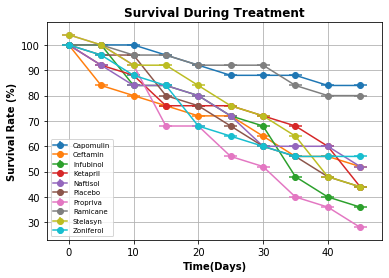

In [31]:
# Generate the Plot (Accounting for percentages)
x_axis = micetable.index.values
drugs = micetable.columns.values

for drug in drugs:
    plt.errorbar(x_axis,micetable[drug]/25*100,label=drug,marker='o',xerr=1, yerr=1)
    

plt.title("Survival During Treatment" ,fontweight="bold");
plt.xlabel("Time(Days)" ,fontweight="bold");
plt.ylabel("Survival Rate (%)" ,fontweight="bold");
plt.grid()
plt.legend(loc='best',prop={'size': 7})

# Save the Figure
plt.savefig("Survival during treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [39]:
# Calculate the percent changes for each drug
percent_change=(mtv_table.iloc[-1,:]-mtv_table.iloc[0,:])/mtv_table.iloc[0,:]*100
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

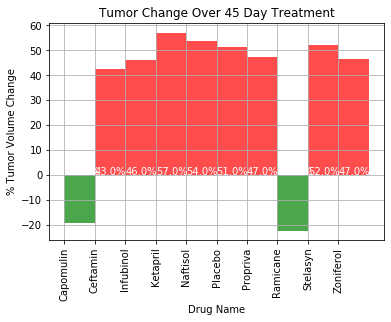

In [55]:
# Store all Relevant Percent Changes into a Tuple
x_values=percent_change.index.values
y_values=tuple(percent_change)

my_color=[]


# Splice the data between passing and failing drugs
for k in y_values:
    if k>0:
        my_color.append('r')
    else:
        my_color.append('g')

x_axis=np.arange(len(y_values))

plt.bar(x_axis, y_values, color=my_color, alpha=.7, align="edge",width=1)

# Orient widths. Add labels, tick marks, etc. 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_values, rotation="vertical")
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug Name")
plt.ylabel("% Tumor Volume Change")
plt.grid()

# Use functions to label the percentages of changes
for i, v in enumerate(tick_locations):
    plt.text(v, 0, str(round(y_values[i],0)) + '%', color='white')



# Save the Figure
plt.savefig("Tumor Change over 45 days.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)